In [1]:
from main_extractor import *
from utils.text_feature import *
from utils.dict_lib import *

fs = [TextFeature("rank", "mean_key"), TextFeature("words", "select_keys_proportion", args=("я", "ты")), 
      TextFeature("parts", "select_keys_proportion", args=("VERB",)), TextFeature("len_words", "mean_key", args=(16,)),
      TextFeature("homogeneity", "mean_key", args=(100,))]

d = text2fеatures("1813\\3", fs)
print(d)

d = important_feature("words", n_top=30, rang=(2, 5))
print(d)
print(len(d))

d = important_feature("n_grams_letter", n_top=40, rang=(3, 5))
print(d)
print(count_features(fs))
print(get_names(fs))

[0.1004481418852913, 0.03561643835616438, 0.03561643835616438, 0.18904109589041096, 0.292722602739726, 0.13]
{'друг': 4, 'о': 4, 'любовь': 3, 'вы': 5, 'всё': 2, 'рука': 2, 'весь': 5, 'а': 5, 'где': 4, 'душа': 3, 'день': 2, 'от': 2, 'они': 5, 'его': 2, 'то': 5, 'да': 2, 'так': 3, 'кто': 2, 'нет': 2, 'тот': 2}
20
{'нны': 4, 'дру': 5, 'рас': 4, 'лен': 4, 'руг': 4, 'ель': 3, 'люб': 4, 'вет': 4, 'тра': 3, 'под': 5, 'что': 5, 'нас': 3, 'нов': 5, 'нье': 4, 'его': 5, 'льн': 3, 'как': 5, 'сво': 3, 'раз': 4, 'ово': 5, 'мен': 3, 'одн': 3, 'она': 4}
6
['rank', 'words/я', 'words/ты', 'parts/VERB', 'len_words', 'homogeneity']


In [9]:
from models.data import *
from periods import *

fs = [TextFeature("len_words", "mean_key", args=(16,)), TextFeature("homogeneity", "mean_key", args=(100,)), TextFeature("rank", "mean_key"), 
      TextFeature("words", "select_keys_proportion", args=("любовь", "друг", "они", "я", "ты", "она", "что")), 
      TextFeature("parts", "select_keys_proportion", args=("PRON", "ADP", "ADV")), 
      TextFeature("rels", "select_keys_proportion", args=("advmod", "conj", "amod")),
      TextFeature("n_grams_letter", "select_keys_proportion", args=("ной", "енн", "его")),
      TextFeature("n_grams_word", "select_keys_proportion", args=("что же",))]

per1 = sum(periods[:3], [])
per2 = sum(periods[3:], [])
pers = [per1, per2]

data = get_data(pers, fs, [0, 1], train_part=0.8, val_part=0.1, not_null_bord=14


Epoch 1/75
8/8 [==============================] - 1s 30ms/step - loss: 0.6924 - acc: 0.5772 - val_loss: 0.6907 - val_acc: 0.5517
Epoch 2/75
8/8 [==============================] - 0s 9ms/step - loss: 0.6919 - acc: 0.5447 - val_loss: 0.6901 - val_acc: 0.5517
Epoch 3/75
8/8 [==============================] - 0s 9ms/step - loss: 0.6915 - acc: 0.5366 - val_loss: 0.6897 - val_acc: 0.5517
Epoch 4/75
8/8 [==============================] - 0s 8ms/step - loss: 0.6911 - acc: 0.5203 - val_loss: 0.6893 - val_acc: 0.5517
Epoch 5/75
8/8 [==============================] - 0s 9ms/step - loss: 0.6910 - acc: 0.5447 - val_loss: 0.6889 - val_acc: 0.5517
Epoch 6/75
8/8 [==============================] - 0s 8ms/step - loss: 0.6907 - acc: 0.5569 - val_loss: 0.6885 - val_acc: 0.5517
Epoch 7/75
8/8 [==============================] - 0s 8ms/step - loss: 0.6903 - acc: 0.5285 - val_loss: 0.6882 - val_acc: 0.5517
Epoch 8/75
8/8 [==============================] - 0s 9ms/step - loss: 0.6899 - acc: 0.5407 - val_loss: 

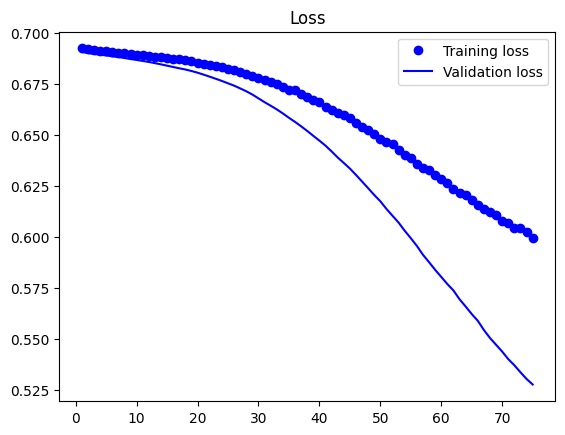

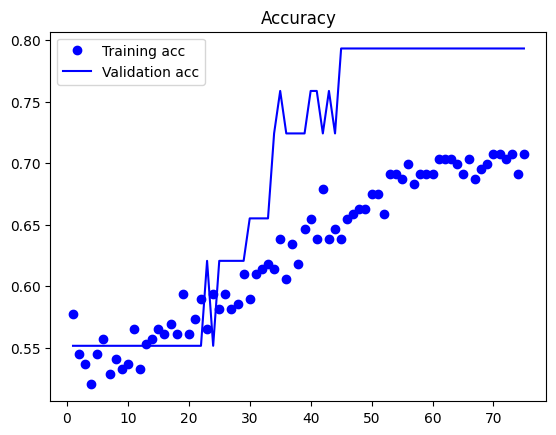

In [29]:
from models.fit import fit
from models.models import get_model1
from utils.text_feature import count_features

epochs = 75
model = get_model1(count_features(fs))
fit(model, data, epochs)

In [11]:
from models.data import *

data.save('data1')
d = load_data('data1')


In [19]:
model.save(root + "models\\saved_models\\2per(1824) acc0.758 data1.keras")

model.evaluate(data.x_val+data.x_test, data.y_val+data.y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5978 - acc: 0.7581


[0.5978447794914246, 0.7580645084381104]

2/2 [==============================] - 0s 3ms/step
threshold 0.0: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.05: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.1: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.15: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.2: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.25: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.3: acc = 0.5, precision = 0.4918032786885246, recall = 1.0, f1 = 0.6593406593406593, fpr = 0.96875
threshold 0.35: acc = 0.5161290322580645, precision = 0.5, recall = 0.9666666666666667, f1 = 0.65909090

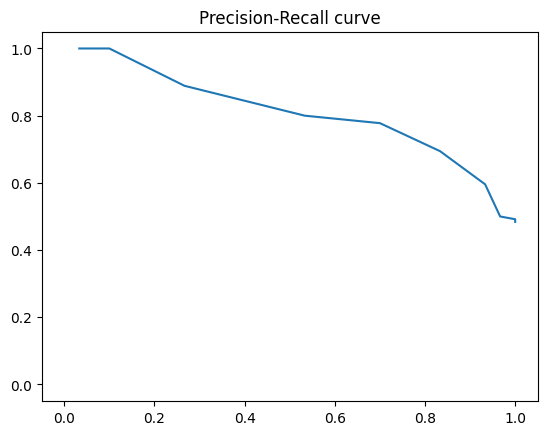

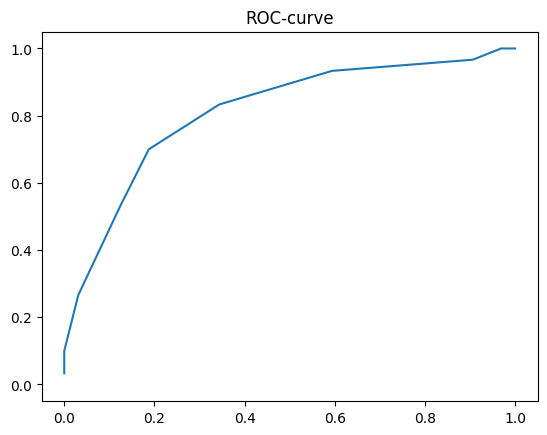

In [1]:
from keras import models
from models.data import *
from models.fit import show_metrics

data = load_data('data1')
loaded_model = models.load_model(root + "models\\saved_models\\2per(1824) acc0.758 data1.keras")
loaded_model.evaluate(data.x_val+data.x_test, data.y_val+data.y_test)
predicts = loaded_model.predict(data.x_val+data.x_test)
show_metrics(predicts, data.y_val+data.y_test)